In [2]:
"""import kagglehub

# Download latest version
path = kagglehub.dataset_download("onurkarasoy/turkish-sms-collection")

print("Path to dataset files:", path)"""

'import kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("onurkarasoy/turkish-sms-collection")\n\nprint("Path to dataset files:", path)'

In [34]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df = pd.read_csv(r"dataset\TurkishSmsCollection.csv",sep=";")

In [5]:
df.head(20)

,Message,Group,GroupText
0,125 lira,2,Normal
1,Baskanin aksam toplantısi fenaymis :),2,Normal
2,Bilal yalçnlara ne zaman gidiyoruz?,2,Normal
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1,Spam
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1,Spam
5,İyi ya dokuz eylül iyidir arş.gör falan kovala ;),2,Normal
6,İyiyim teşekkürler oturuyoruz nazarda arkadaşl...,2,Normal
7,Kapatamıyorun ayarlara girmem lazım :),2,Normal
8,Menüye girsem görünür mü acaba ??,2,Normal
9,Önemli değil hocam iyi akşamlar ;),2,Normal


In [6]:
df["Message"] = df["Message"].str.lower()

In [7]:
df["Message"] = df["Message"].apply(lambda x: re.sub(r'[^a-zA-ZğüşöçİĞÜŞÖÇ0-9 ]', ' ', x))

In [8]:
df["Group"] = df["Group"].replace(1,0)
df["Group"] = df["Group"].replace(2,1)

In [9]:
df.rename(columns={"Group":"Label"},inplace=True)

In [10]:
df.head(20)

,Message,Label,GroupText
0,125 lira,1,Normal
1,baskanin aksam toplant si fenaymis,1,Normal
2,bilal yalçnlara ne zaman gidiyoruz,1,Normal
3,bip ile mesajlarimi aninda daha eglenceli gon...,0,Spam
4,digiturkten firsat size ozel yil sonuna kadar...,0,Spam
5,i yi ya dokuz eylül iyidir arş gör falan koval...,1,Normal
6,i yiyim teşekkürler oturuyoruz nazarda arkadaş...,1,Normal
7,kapatam yorun ayarlara girmem laz m,1,Normal
8,menüye girsem görünür mü acaba,1,Normal
9,önemli değil hocam iyi akşamlar,1,Normal


In [11]:
"""import nltk
nltk.download("stopwords")"""

'import nltk\nnltk.download("stopwords")'

In [12]:
from nltk.corpus import stopwords

In [13]:
turkish_stopwords = set(stopwords.words("turkish"))
df["Message"] = df["Message"].apply(lambda x: " ".join([word for word in x.split() if word not in turkish_stopwords]))

In [14]:
df["Message"][17]

'100 pamuk penye percale saten carsaf carsaf takimlarinda 50 50 indirim 02 agustos son sms iptal 5830 a mc mersis 0273065777400019 madamecoco com'

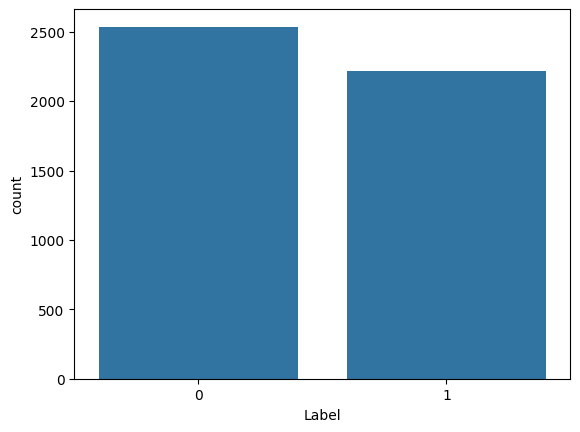

In [15]:
sns.countplot(x=df['Label'])
plt.show()

In [16]:
length_of_the_messages = df["Message"].str.split("\\s+")
print(length_of_the_messages.str.len().max())

59


In [24]:
avg_words_len=round(sum([len(i.split()) for i in df['Message']])/len(df['Message']))
print(avg_words_len)

17


In [17]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Message']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

13212


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X , y = np.asanyarray(df["Message"]), np.asanyarray(df["Label"])
new_df = pd.DataFrame({"Text": X,"label": y})
X_train,X_test,y_train,y_test = train_test_split(new_df["Text"],new_df["label"],test_size=0.2,random_state=42)
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((3800,), (3800,), (951,), (951,))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec , X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [22]:
nb_accuracy = accuracy_score(y_test,baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test,baseline_model.predict(X_test_vec)))

0.9747634069400631
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       529
           1       1.00      0.94      0.97       422

    accuracy                           0.97       951
   macro avg       0.98      0.97      0.97       951
weighted avg       0.98      0.97      0.97       951



In [26]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS = total_words_length
OUTPUTLEN = avg_words_len

text_vec = TextVectorization(max_tokens=MAXTOKENS , standardize="lower_and_strip_punctuation",output_mode="int",output_sequence_length=OUTPUTLEN)
text_vec.adapt(X_train)

In [27]:
sample_sentence = "example message"
text_vec([sample_sentence])

<tf.Tensor: shape=(1, 17), dtype=int64, numpy=
array([[   1, 7173,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)>

In [32]:
embedding_layer= layers.Embedding(input_dim=MAXTOKENS,output_dim=128,embeddings_initializer="uniform",input_shape=(OUTPUTLEN))

In [35]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 17)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 17, 128)        │     1,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,695,297 (6.47 MB)

 Trainable params: 1,695,297 (6.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_1 = model_1.fit(X_train,y_train,epochs=,validation_data=(X_test,y_test),validation_steps=int(0.2*len(X_test)))

Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9625 - loss: 0.6139 - val_accuracy: 0.9895 - val_loss: 0.5734
Epoch 2/5
  9/119 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9954 - loss: 0.5707

c:\Users\Kanki\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9977 - loss: 0.5684 - val_accuracy: 0.9947 - val_loss: 0.5684
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9997 - loss: 0.5639 - val_accuracy: 0.9947 - val_loss: 0.5674
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.5627 - val_accuracy: 0.9979 - val_loss: 0.5674
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.5626 - val_accuracy: 0.9979 - val_loss: 0.5675


<Axes: >

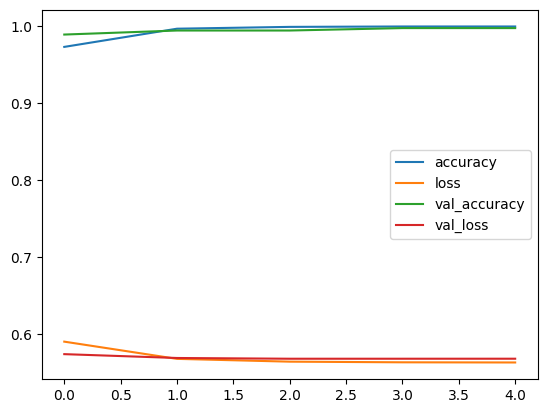

In [39]:
pd.DataFrame(history_1.history).plot()